In [1]:
## Pre-setting
# automatically adjust the width of the notebook code cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2

# display the figure in the notebook
%matplotlib inline

# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
## Add path
import os
import sys
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

In [3]:
## System package only for notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.pyplot import get_cmap
cmapname= "magma_r"

In [4]:
## Private package
from corpora.pp_single_stopword import synthetic_single_stopword_terminal
from corpora.synthetic import sort_synthetic_corpora_output


# example 

## create synthetic benchmark and plot

In [5]:
## Parameters for distribution

V = 100 # nubmer of words
K = 5  # nubmer of topics

dist_w = 'uni'  # global word frequency. uni or zipf

dist_stop = 'uni' # probability of stopwords appearance. uni or zipf
p_s = 0.1 # 100 * p_s is the percentage of the stopword 

c_w = 0.7  # degree of structure for word mixing for each topic. 0: random; 1: structure
# c_t = c_w # degree of structure for topic mixing for each document. 0: random; 1: structure

## Parameters for document

D = 100 # nubmer of document
m = 100 # length of document


## Parameters for random function
seed = 5
burstiness = None


In [6]:
dict_out_syn_stop = synthetic_single_stopword_terminal(V = V , K = K, D = D, m = m, dist_w =dist_w, dist_stop = dist_stop, p_s = p_s, c_w = c_w, seed = seed, burstiness = burstiness)

In [7]:
dict_out_syn_stop.keys()

dict_keys(['p_w', 'document_topic_assign_list', 'n_wj', 'p_td', 'texts', 'n_wd', 'word_topic_assign_list', 'p_w_td', 'p_wt', 'V_t', 'state_dwz', 'n_jd', 'p_t'])

In [8]:
path_tmp_file  = os.path.abspath(os.path.join(os.pardir,'tmp_syn_stop_figure'))
print(path_tmp_file)
if not os.path.exists(path_tmp_file):
    os.makedirs(path_tmp_file)

/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure


In [9]:
arr_c_w = np.array([0.0,0.5,1.0])
# arr_p_s = np.arange(0, 0.8, 0.1)
arr_p_s = [0.2]
burstiness_list = [None, 0.0001, 0.1, 10,]


## Synthetic benchmark with stopwords

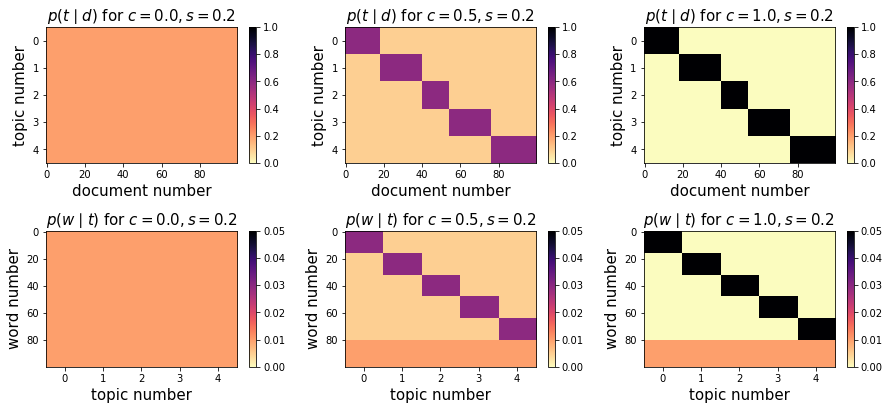

/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure/fig_syn_stop_01_K5_V100_pWuni_ps20_burstNo_pwt_ptd.pdf


In [10]:



for p_s in arr_p_s:
    pl.figure(figsize=(15,10))
    for i_c_w,c_w in enumerate(arr_c_w):
        
        dict_out_syn_stop = synthetic_single_stopword_terminal(V = V , K = K, D = D, m = m, dist_w =dist_w, dist_stop = dist_stop, p_s = p_s, c_w = c_w, seed = seed, burstiness = burstiness)
        p_td_sorted, p_wt_sorted, n_wd_sorted, n_wj_sorted, n_jd_sorted = sort_synthetic_corpora_output(dict_out_syn_stop)


        ## the topic-document matrix
        pl.subplot(3,len(arr_c_w),i_c_w+1)
        pl.title(r'$p( t \mid d )$ for $c=%s,s=%s$'%(c_w, p_s),fontsize=15)
        pl.xlabel('document number',fontsize=15)
        pl.ylabel('topic number',fontsize=15)
        pl.imshow(p_td_sorted,aspect='auto',interpolation='nearest',vmin=0,vmax=1,cmap=pl.get_cmap(cmapname))
        pl.colorbar()

        ## the word-topic matrix
        pl.subplot(3,len(arr_c_w),i_c_w+4)
        pl.title(r'$p(w \mid t )$ for $c=%s,s=%s$'%(c_w, p_s),fontsize=15)
        pl.xlabel('topic number',fontsize=15)
        pl.ylabel('word number',fontsize=15)
        
        if dist_w == 'zipf':
            vmax=p_wt_sorted.max() / 5
            vmax= 5 / V 
        else:
            vmax= 5 / V          
            
        pl.imshow(p_wt_sorted,aspect='auto',interpolation='nearest',vmin=0,vmax=vmax,cmap=get_cmap(cmapname))
        pl.colorbar()

    pl.subplots_adjust(hspace=0.5,wspace=0.25)

    pl.show()

    if burstiness == None:
        burstiness = 'No'
    figure_title = 'fig_syn_stop_01_K%s_V%s_pW%s_ps%s_burst%s_pwt_ptd.pdf'%(K,V,dist_w,int(p_s*100),burstiness )
    figure_path_title = os.path.join(path_tmp_file, figure_title)  
    print(figure_path_title)
    pl.savefig(figure_path_title, bbox_inches='tight')

    pl.close()



## Synthetic benchmark with different levels of burstiness

In [11]:
%%time 

for burstiness in burstiness_list:
    for p_s in arr_p_s:
        pl.figure(figsize=(15,10))
        for i_c_w,c_w in enumerate(arr_c_w):

            dict_out_syn_stop = synthetic_single_stopword_terminal(V = V , K = K, D = D, m = m, dist_w =dist_w, dist_stop = dist_stop, p_s = p_s, c_w = c_w, seed = seed, burstiness = burstiness)
            p_td_sorted, p_wt_sorted, n_wd_sorted, n_wj_sorted, n_jd_sorted = sort_synthetic_corpora_output(dict_out_syn_stop)


            ## the word-topic matrix
            pl.subplot(3,len(arr_c_w),i_c_w+1)
            pl.title(r'$n_{wj}$ for $c=%s,s=%s$'%(c_w, p_s),fontsize=15)
            pl.xlabel('topic number',fontsize=15)
            pl.ylabel('word number',fontsize=15)

            if dist_w == 'zipf':
                vmax=n_wj_sorted.max() / 8
            else:
                vmax=n_wj_sorted.max() * 2 

            pl.imshow(n_wj_sorted,aspect='auto',interpolation='nearest',vmin=0,vmax=vmax,cmap=get_cmap(cmapname))
            pl.colorbar()

            ## the topic-document matrix
            pl.subplot(3,len(arr_c_w),i_c_w+4)
            pl.title(r'$n_{jd}$ for $c=%s,s=%s$'%(c_w, p_s),fontsize=15)
            pl.xlabel('document number',fontsize=15)
            pl.ylabel('topic number',fontsize=15)

            if dist_w == 'zipf':
                vmax=n_jd_sorted.max() / 4
            else:
                vmax=n_jd_sorted.max() * 2 

            pl.imshow(n_jd_sorted,aspect='auto',interpolation='nearest',vmin=0,vmax=vmax,cmap=get_cmap(cmapname))
            pl.colorbar()


                ## the word-document matrix
            pl.subplot(3,len(arr_c_w),i_c_w+7)
            pl.title(r'$n_{wd}$ for $c=%s,s=%s$'%(c_w, p_s),fontsize=15)
            pl.xlabel('document number',fontsize=15)
            pl.ylabel('word number',fontsize=15)

            if dist_w == 'zipf':
                vmax=n_wd_sorted.max() / 5
            else:
                vmax=n_wd_sorted.max() * 2 

            pl.imshow(n_wd_sorted,aspect='auto',interpolation='nearest',vmin=0,vmax=vmax,cmap=get_cmap(cmapname))
            pl.colorbar()

        pl.subplots_adjust(hspace=0.5,wspace=0.25)

        # pl.show()
        figure_title = 'fig_syn_stop_02_K%s_V%s_D%s_m%s_pW%s_ps%s_burst%s_statistics.pdf'%(K,V,D,m,dist_w,int(p_s*100), burstiness)
        figure_path_title = os.path.join(path_tmp_file, figure_title)  
        print(figure_path_title)
        pl.savefig(figure_path_title,  bbox_inches='tight')

        pl.close()

/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure/fig_syn_stop_02_K5_V100_D100_m100_pWuni_ps20_burstNone_statistics.pdf
/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure/fig_syn_stop_02_K5_V100_D100_m100_pWuni_ps20_burst0.0001_statistics.pdf
/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure/fig_syn_stop_02_K5_V100_D100_m100_pWuni_ps20_burst0.1_statistics.pdf
/Users/hanyushi/projects/s11_synthetic_benchmark_topic_model_tutorial/tmp_syn_stop_figure/fig_syn_stop_02_K5_V100_D100_m100_pWuni_ps20_burst10_statistics.pdf
CPU times: user 12.8 s, sys: 6.66 s, total: 19.5 s
Wall time: 19.5 s


## Test

In [12]:
1

1